In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
titanic = pd.read_csv('D:\\ml-intro-rs-school\\2 - Descriptive Statistics and Data Exploration\\data\\train.csv')

# Context

**Exploratory data analysis of Titanic dataset**

# Data quality assessment

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [7]:
titanic.isnull().sum().sort_values(ascending=False)
#наибольшее кол-во пропущенных значений - кабина, затем идут номер билета и возраст

Cabin          67866
Ticket          4623
Age             3292
Embarked         250
Fare             134
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
dtype: int64

<AxesSubplot:>

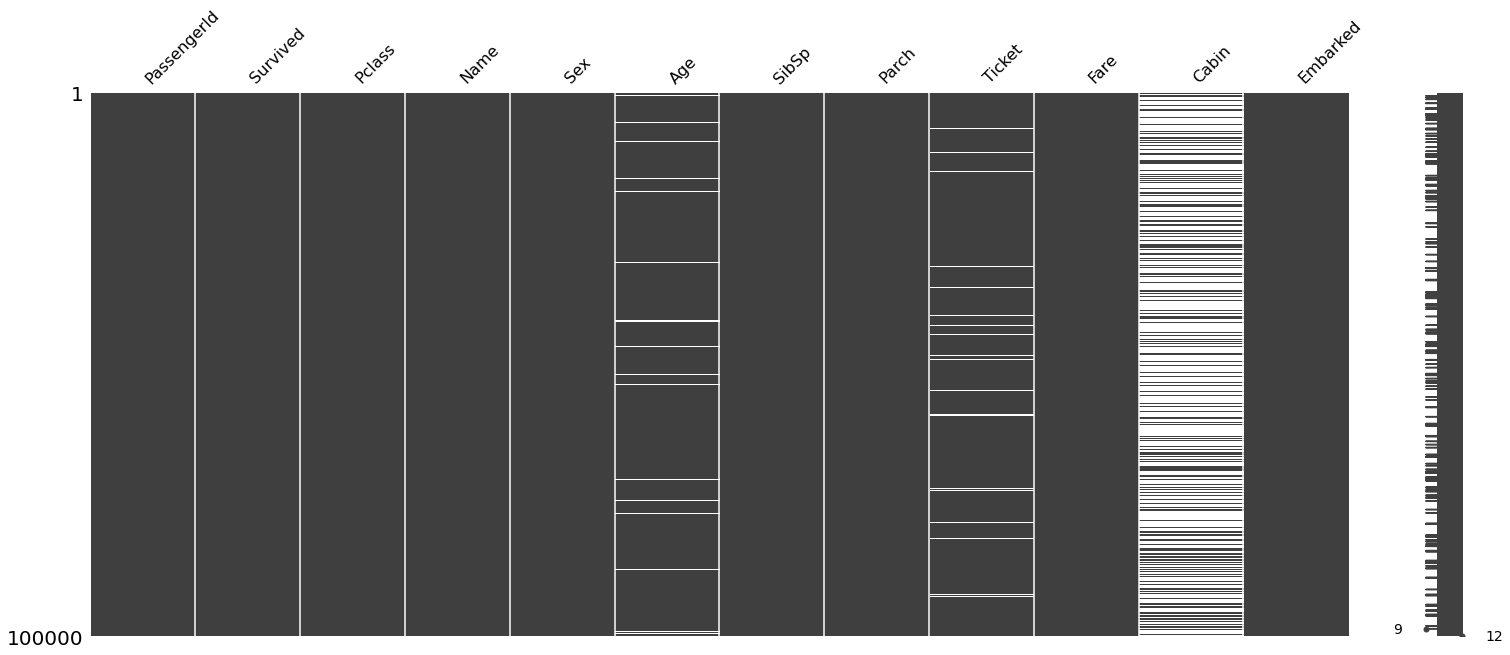

In [8]:
msno.matrix(titanic)

In [70]:
titanic.groupby(titanic['Age'].isnull()).mean()
# в среднем пассажиры с указанным возрастом и без него имеют примерно одинаковые хар-ки

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,50010.689674,0.428279,2.106206,38.355472,0.398240,0.455278,43.940262
True,49670.784629,0.411908,2.127582,NaN,0.381531,0.433475,43.608126


In [78]:
for col in titanic.columns:
    pct_missing = titanic[col].isnull().mean()
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 3%
SibSp - 0%
Parch - 0%
Ticket - 5%
Fare - 0%
Cabin - 68%
Embarked - 0%


# Data exploration

In [87]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


In [11]:
titanic.groupby('Survived').count()
#выжило - 42774 человека, погибло - 57226

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,57226,57226,57226,57226,55290,57226,57226,55016,57153,12577,57098
1,42774,42774,42774,42774,41418,42774,42774,40361,42713,19557,42652


In [12]:
titanic.groupby('Survived').mean()
#в среднем стоимость билета выживших пассажиров выше, чем у погибших, а так же класс пассажира выше у выживших

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,49950.693636,2.316744,36.708695,0.403348,0.435379,32.647516
1,50064.796512,1.826179,40.553799,0.390120,0.480222,59.025192


In [13]:
titanic[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.711525
1,male,0.205795


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

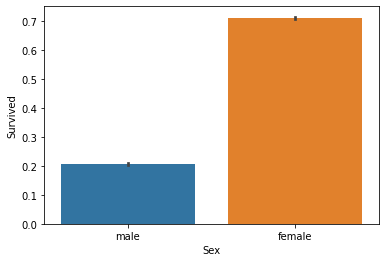

In [14]:
sns.barplot(x='Sex', y='Survived', data=titanic)

In [15]:
titanic['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [16]:
titanic[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.579779
1,2,0.525018
2,3,0.247305


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

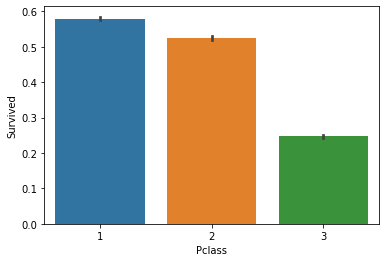

In [17]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

<AxesSubplot:>

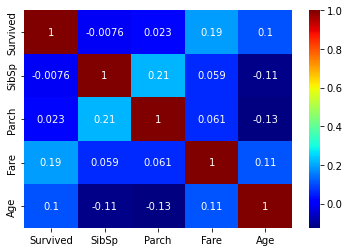

In [18]:
sns.heatmap(titanic[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot=True, cmap='jet')

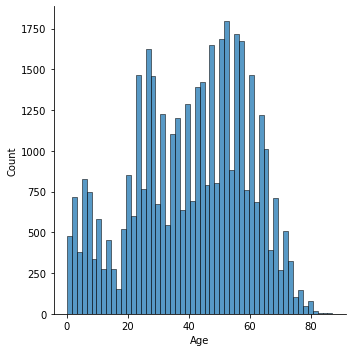

In [19]:
sns.displot(titanic[titanic['Survived'] == 1]['Age'])

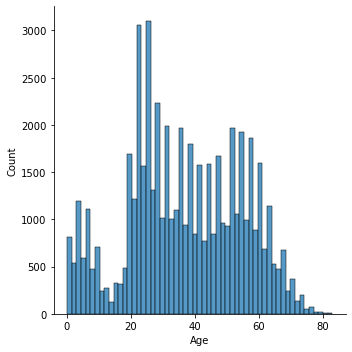

In [20]:
sns.displot(titanic[titanic['Survived'] == 0]['Age'])

In [21]:
titanic[titanic['Survived'] == 1]['Age'].mode()

0    52.0
dtype: float64

In [22]:
titanic[titanic['Survived'] == 0]['Age'].mode()

0    23.0
dtype: float64

In [23]:
titanic[titanic['Survived'] == 1]['Age'].value_counts().reset_index().rename(columns={'index' : 'Age', 'Age' : 'Count'}).head(20)

,Age,Count
0,52.0,937
1,54.0,869
2,55.0,864
3,51.0,861
4,53.0,856
5,57.0,848
6,56.0,847
7,26.0,827
8,48.0,826
9,47.0,822


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

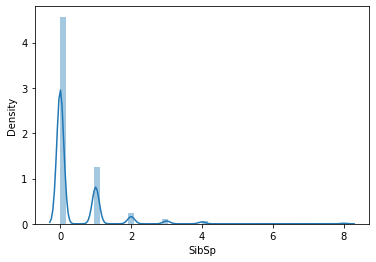

In [24]:
sns.distplot(titanic[titanic['Survived'] == 1]['SibSp'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

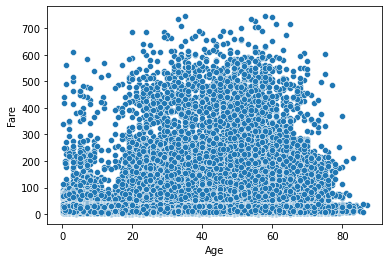

In [25]:
sns.scatterplot(data=titanic, x='Age', y='Fare')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

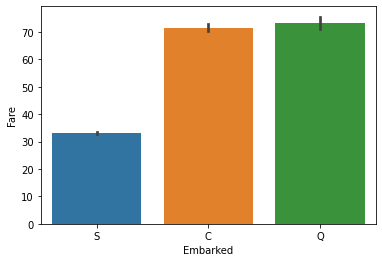

In [26]:
sns.barplot(x='Embarked', y='Fare', data=titanic)
#пассажиры из Саутгемптона в среднем брали более дешевые билеты, чем пассажиры из Шербура и Квинстауна

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

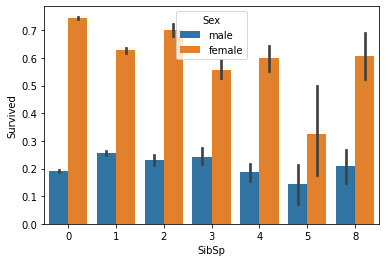

In [27]:
sns.barplot(x='SibSp', y='Survived', data=titanic, hue='Sex')

In [28]:
titanic['SibSp'].unique()

array([2, 0, 1, 3, 4, 8, 5], dtype=int64)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

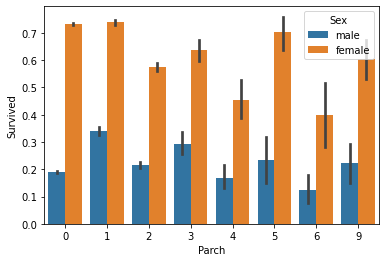

In [29]:
sns.barplot(x='Parch', y='Survived', data=titanic, hue='Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

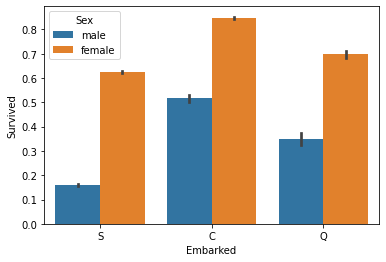

In [30]:
sns.barplot(x='Embarked', y='Survived', data=titanic, hue='Sex')
#наименьшая вероятность выживания у мужчин из Саутгемптона

In [51]:
passengers_with_cabin = titanic[titanic['Cabin'].notnull()]
passengers_with_cabin['Cabin'].nunique()

26992

In [69]:
passengers_with_cabin.groupby('Cabin', as_index=False)['Survived'].sum()['Survived'].value_counts()

1    15318
0     9666
2     1806
3      184
4       15
5        3
Name: Survived, dtype: int64

In [48]:
passengers_without_cabin = titanic[titanic['Cabin'].isnull()]
passengers_without_cabin['PassengerId'].nunique()

67866

In [46]:
passengers_without_cabin.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,44649,44649,44649,44649,43138,44649,44649,42453,44593,0,44551
1,23217,23217,23217,23217,22481,23217,23217,20873,23181,0,23153


In [82]:
titanic.groupby(['Embarked', 'Sex']).count()
#наибольшее кол-во пассажиров садилось в Саутгемптоне, причем мужчин в 2 раза больше, чем женщин, следовательно можем сделать\
#вывод, что именно из-за этого наименьшая вероятность выживания у мужчин из Саутгемптона, а не из-за места посадки

PassengerId  Survived  Pclass   Name    Age  SibSp  Parch  \
Embarked Sex                                                                 
C        female        15786     15786   15786  15786  15295  15786  15786   
         male           6401      6401    6401   6401   6161   6401   6401   
Q        female         3852      3852    3852   3852   3721   3852   3852   
         male           1572      1572    1572   1572   1516   1572   1572   
S        female        24117     24117   24117  24117  23355  24117  24117   
         male          48022     48022   48022  48022  46412  48022  48022   

                 Ticket   Fare  Cabin  
Embarked Sex                           
C        female   15598  15763   9007  
         male      6351   6391   3972  
Q        female    3812   3845   3052  
         male      1557   1571    970  
S        female   21713  24089   6038  
         male     46105  47958   9007

In [85]:
titanic.groupby(titanic['Cabin'].notnull()).mean()
#в среднем у пассажиров без указанной каюты шанс на выживание меньше, чем у пассажиров с указанной. Так же пассажиры\
#"без каюты" моложе, путешествуют более низким классом и за билеты заплатили меньше. Из этого опять же можно сделать вывод,\
#что выше шанс на выживание у богатых людей, которые путешествуют классом выше


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,49956.952627,0.342101,2.515766,35.408465,0.357955,0.404812,21.690953
True,50089.358717,0.608608,1.243418,44.575668,0.481608,0.559625,90.893801


# Summary

In [ ]:
"""
Наибольшее кол-во пропущеных данных в колонке каюты, тк либо человек путешствовал
без каюты, либо банальные пропуски данных;

Так же 3% данных пропущено в колоке возраста и 5% в колонке билета;

В среднем пассажиры с указанным возрастом и без него имеют примерно одинаковые 
характеристики, поэтому данные пропуски нельзя считать сущесвенным недостатком данных;

Наибольшее кол-во выживших составляют женщины. Вероятность того, что выживет женщина - примерно 71%, мужчина - примерно 20.5%;

Наибольшее число погибших было в возрасте от 22 до 26 лет; распределение выживших я бы назвал бимодальным, тк большинство
выживших в пределах 24-27 лет и 46-60 лет;

Наблюдается небольшая корреляция в размере 0.21 между колонками родители/дети и родственники/супруги,
следовательно можно предположить, что некоторые люди путешествовали семьями;

Наибольшее кол-во пассажиров село на пароход в Саутгемптоне, причем мужчин в 2 раза больше, чем женщин,
следовательно можем сделать вывод, что именно из-за этого наименьшая вероятность выживания у мужчин из Саутгемптона,
а не из-за места посадки;

В среднем стоимость билета выживших пассажиров выше, чем у погибших, а так же у выживших выше класс пассажира;

Вероятность того, что выживет пассажир первого класса - примерно 58%, второго класса - примерно 52.5%, третьего - 24.7%;

Пассажиры из Саутгемптона в среднем брали более дешевые билеты, чем пассажиры из Шербура и Квинстауна, следовательно
это так же повлияло на процент выживших из этого города, тк процент выживаемости больше у богатых;

Было предположение, что много пропусков в колонке кают из-за того, что, возможно, номер каюты уточнялся уже после крушения у
выживших пассажиров, но это предположение не подтвердилось, тк и у некоторых погибших пассажиров были известны номера их кают;

В среднем у пассажиров без указанной каюты шанс на выживание меньше, чем у пассажиров с указанной. Так же пассажиры
"без каюты" моложе, путешествуют более низким классом и за билеты заплатили меньше. Из этого опять же можно сделать вывод,
что выше шанс на выживание у богатых людей, которые путешествуют классом выше.
"""